In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns

# scTRS tools
import scdrs.util as util
import scdrs.data_loader as dl
import scdrs.method as md
import scdrs

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data'
OUT_FILE = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/supp_table.rv1/data_info.tsv'

In [3]:
df_info = pd.DataFrame(columns=['Data set', 'Species', 'Number of cells', 'Tissues', 'Cell types'])

# TMS FACS
dname = 'TMS FACS'
species = 'Mus musculus'
adata = dl.load_tms_ct(DATA_PATH, data_name='facs')
df_info.loc[dname] = [dname, species, adata.shape[0], ';'.join(sorted(set(adata.obs['tissue']))),
                      ';'.join(sorted(set(adata.obs['cell_ontology_class'])))]

# TMS Droplet
dname = 'TMS Droplet'
species = 'Mus musculus'
adata = dl.load_tms_ct(DATA_PATH, data_name='droplet')
df_info.loc[dname] = [dname, species, adata.shape[0], ';'.join(sorted(set(adata.obs['tissue']))),
                      ';'.join(sorted(set(adata.obs['cell_ontology_class'])))]

# TS FACS
dname = 'TS FACS'
species = 'Homo sapiens'
adata =  dl.load_ts_facs(DATA_PATH, opt='raw', flag_size_factor=False, flag_log1p=False)
df_info.loc[dname] = [dname, species, adata.shape[0], ';'.join(sorted(set(adata.obs['organ_tissue']))),
                      ';'.join(sorted(set(adata.obs['cell_ontology_class'])))]

# Cano-Gamez and Soskic
dname = 'Cano-Gamez & Soskic'
species = 'Homo sapiens'
adata =  dl.load_canogamez(DATA_PATH, opt='raw', flag_size_factor=False, flag_log1p=False)
df_info.loc[dname] = [dname, species, adata.shape[0], 'Blood', ';'.join(sorted(set(adata.obs['cluster.id'])))]

# Nathan
dname = 'Nathan'
species = 'Homo sapiens'
adata =  dl.load_nathan(DATA_PATH, opt='raw', flag_size_factor=False, flag_log1p=False)
df_info.loc[dname] = [dname, species, adata.shape[0], 'Blood', ';'.join(sorted(set(adata.obs['cluster_name'])))]

# Aizarani
dname = 'Aizarani'
species = 'Homo sapiens'
adata =  dl.load_aizarani(DATA_PATH, opt='raw', flag_size_factor=False, flag_log1p=False)
df_info.loc[dname] = [dname, species, adata.shape[0], 'Liver', ';'.join(sorted(set(adata.obs['celltype'])))]

# Halpern and Shenhav
dname = 'Halpern & Shenhav'
species = 'Mus musculus'
adata =  dl.load_halpern(DATA_PATH, opt='raw', flag_size_factor=False, flag_log1p=False)
df_info.loc[dname] = [dname, species, adata.shape[0], 'Liver', 'Hepatocyte']

# Richter and Deligiannis
dname = 'Richter & Deligiannis'
species = 'Mus musculus'
adata =  dl.load_richter(DATA_PATH, opt='raw', flag_size_factor=False, flag_log1p=False)
df_info.loc[dname] = [dname, species, adata.shape[0], 'Liver', 'Hepatocyte']

# Rao
dname = 'Rao'
species = 'Mus musculus'
adata =  dl.load_rao(DATA_PATH, opt='raw', flag_size_factor=False, flag_log1p=False)
df_info.loc[dname] = [dname, species, adata.shape[0], 'Liver', 
                      ';'.join(sorted(set(adata.obs['annotated.idents'])))]

Trying to set attribute `.obs` of view, copying.


In [5]:
tissue_list = []
celltype_list = []
for dname in df_info.index:
    temp_tissue_list = df_info.loc[dname, 'Tissues'].split(';')
    temp_celltype_list = [
        x for x in df_info.loc[dname, 'Cell types'].split(';') if str(x).lower() != 'nan']
    tissue_list += temp_tissue_list
    celltype_list += temp_celltype_list
    print('# %s\tn_cell=%d\tn_tissue=%d\tn_celltype=%d'
          %(dname, df_info.loc[dname, 'Number of cells'], len(temp_tissue_list), len(temp_celltype_list)))

tissue_list = sorted(set(tissue_list))
celltype_list = sorted(set(celltype_list))
print('# Total\tn_cell=%d\tn_tissue=%d\tn_celltype=%d'
      %(df_info['Number of cells'].sum(), len(tissue_list), len(celltype_list)) )

df_info.to_csv(OUT_FILE, sep='\t')

# TMS FACS	n_cell=110096	n_tissue=23	n_celltype=120
# TMS Droplet	n_cell=245389	n_tissue=16	n_celltype=123
# TS FACS	n_cell=26813	n_tissue=24	n_celltype=134
# Cano-Gamez & Soskic	n_cell=43112	n_tissue=1	n_celltype=22
# Nathan	n_cell=500089	n_tissue=1	n_celltype=29
# Aizarani	n_cell=10372	n_tissue=1	n_celltype=11
# Halpern & Shenhav	n_cell=1415	n_tissue=1	n_celltype=1
# Richter & Deligiannis	n_cell=1649	n_tissue=1	n_celltype=1
# Rao	n_cell=19254	n_tissue=1	n_celltype=15
# Total	n_cell=958189	n_tissue=36	n_celltype=326


In [6]:
tissue_list = []
for ds in df_info.index:
    tissue_list.extend(df_info.loc[ds, 'Tissues'].split(';'))
tissue_list = sorted(set(tissue_list))
print(', '.join(tissue_list))

Aorta, BAT, Bladder, Blood, Bone_Marrow, Brain_Myeloid, Brain_Non-Myeloid, Diaphragm, Eye, Fat, GAT, Heart, Heart_and_Aorta, Kidney, Large_Intestine, Limb_Muscle, Liver, Lung, Lymph_Node, MAT, Mammary, Mammary_Gland, Marrow, Muscle, Pancreas, Prostate, SCAT, Salivary_Gland, Skin, Small_Intestine, Spleen, Thymus, Tongue, Trachea, Uterus, Vasculature


In [7]:
# Balancenes of TMS FACS
dname = 'TMS FACS'
adata = dl.load_tms_ct(DATA_PATH, data_name='facs')
temp_df = adata.obs.groupby('cell_ontology_class').agg({'cell':len})
temp_df = temp_df.sort_values('cell', ascending=False) / adata.shape[0]
for top in [1,5,10]:
    print('Top %-2d %s cell types: %.1f%%'%(top, dname, temp_df['cell'][:top].sum()*100))

Trying to set attribute `.obs` of view, copying.


Top 1  TMS FACS cell types: 12.1%
Top 5  TMS FACS cell types: 29.8%
Top 10 TMS FACS cell types: 44.2%


### Summarize gene stats 

In [8]:
DATA_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data'
DF_HOM = pd.read_csv(DATA_PATH+'/gene_annotation/mouse_human_homologs.txt', sep='\t')
DIC_MAP_H2M = {x:y for x,y in zip(DF_HOM['HUMAN_GENE_SYM'], DF_HOM['MOUSE_GENE_SYM'])}
DIC_MAP_M2H = {x:y for x,y in zip(DF_HOM['MOUSE_GENE_SYM'], DF_HOM['HUMAN_GENE_SYM'])}

DIC_DNAME = {
    'tms_facs' : ['TMS FACS', ],
    'tms_droplet' : ['TMS Droplet', ],
    'ts_facs' : ['TS FACS', ],
    'canogamez' : ['Cano-Gamez & Soskic et al.', ],
    'nathan' : ['Nathan et al.', ],
    'zeisel_2015' : ['Zeisel & Muñoz- Manchado et al.', ],
    'zeisel_2018' : ['Zeisel et al.', ],
    'habib_li' : ['Habib & Li et al.', ],
    'habib_davidi_basu' : ['Habib, Avraham-Davidi, & Basu et al.', ],
    'ayhan' : ['Ayhan et al.', ],
    'yao' : ['Yao et al.', ],
    'zhong' : ['Zhong et al.', ],
    'aizarani' : ['Aizarani et al.', ],
    'halpern' : ['Halpern & Shenhav et al.', ],
    'richter' : ['Richter & Deligiannis et al.', ],
    'rao_wang' : ['Taychameekiatchai et al.', ],
}

STATS_FILE = DATA_PATH+'/single_cell_data/gene_stats/@.tsv'
FIG_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/results/fig_data.rv1'

In [9]:
DIC_STATS = {}
for dname in DIC_DNAME:
    fpath = STATS_FILE.replace('@', dname)
    if os.path.exists(fpath) is False:
        print('Missing %s'%dname)
        continue
        
    DIC_STATS[dname] = pd.read_csv(fpath, sep='\t', index_col=0)

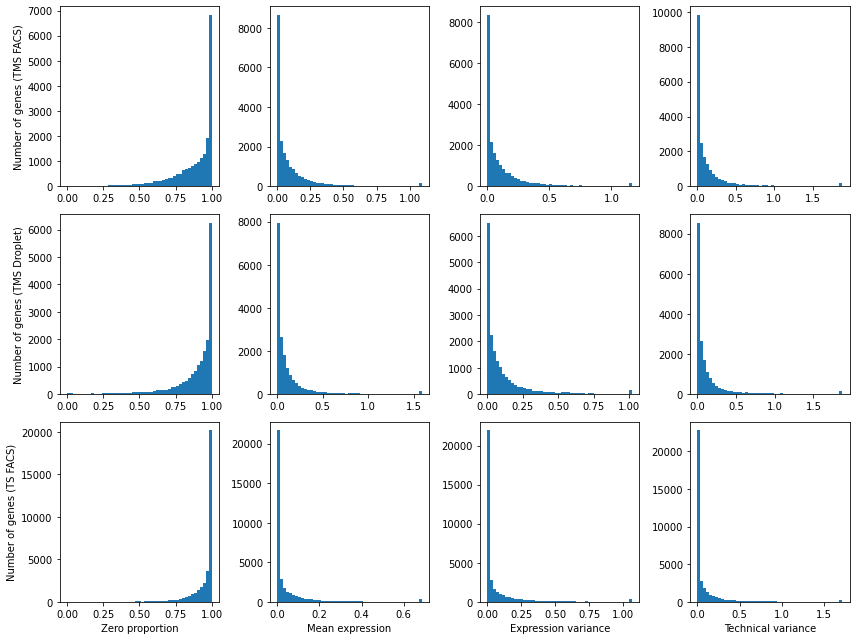

In [10]:
# Distribution of proportion of zero values, means, variances, technical variances
DIC_NAME = {
    'zero_prop' : 'zero proportion', 
    'mean' : 'mean expression', 
    'var' : 'expression variance',
    'var_tech' : 'technical variance',
}

plt.figure(figsize=[12,9])
for i_d,dname in enumerate(['tms_facs', 'tms_droplet', 'ts_facs']):
    for i_t,term in enumerate(['zero_prop', 'mean', 'var', 'var_tech']):        
        plt.subplot(3,4,i_d*4+i_t+1)
        if term == 'zero_prop':
            max_ = 1
        else:
            max_ = np.quantile(DIC_STATS[dname][term], 0.99) * 1.1
        bins = np.linspace(0, max_, 50)
        plt.hist(DIC_STATS[dname][term].clip(upper=max_), bins=bins)
        if i_t==0:
            plt.ylabel('Number of genes (%s)'%DIC_DNAME[dname][0])
        if dname=='ts_facs':
            plt.xlabel(DIC_NAME[term].capitalize())
        
plt.tight_layout()
plt.savefig(FIG_PATH+'/data_dist.svg')
plt.show()

In [11]:
# Supp. Table for gene stats for the 16 data sets 
df_stats = pd.DataFrame(index=DIC_MAP_M2H.keys())
for dname in DIC_STATS:
    temp_df = DIC_STATS[dname][['mean', 'var', 'var_tech', 'zero_prop']].copy()
    temp_df.columns = ['%s.%s'%(dname,x) for x in temp_df]
    if len(set(temp_df.index) & set(df_stats.index))<1000:
        temp_df.index = [DIC_MAP_H2M[x] if x in DIC_MAP_H2M else x for x in temp_df.index]
    print('%s : n_gene=%d'%(dname, len(set(temp_df.index) & set(df_stats.index))))
    df_stats = df_stats.join(temp_df)
df_stats.to_csv(DATA_PATH+'/supp_table.rv1/gene_stats.tsv', sep='\t')

# var_tech_corr
df_corr = df_stats[['%s.var_tech'%x for x in DIC_STATS]].corr()
df_corr.columns = [x.replace('.var_tech','') for x in df_corr]
df_corr.index = [x.replace('.var_tech','') for x in df_corr.index]
df_corr = df_corr.astype(np.float32)
df_corr.to_csv(DATA_PATH+'/supp_table.rv1/gene_stats.var_tech_corr.tsv', sep='\t')

v_corr = df_corr.values[np.tril_indices(df_corr.shape[0], k=-1)]
display(df_corr)
print('Corr=%0.3f SD=%0.3f'%(v_corr.mean(), v_corr.std()))

tms_facs : n_gene=14473
tms_droplet : n_gene=13786
ts_facs : n_gene=15374
canogamez : n_gene=11791
nathan : n_gene=11997
zeisel_2015 : n_gene=11429
zeisel_2018 : n_gene=14201
habib_li : n_gene=11464
habib_davidi_basu : n_gene=11402
ayhan : n_gene=14333
yao : n_gene=15206
zhong : n_gene=12444
aizarani : n_gene=11959
halpern : n_gene=5783
richter : n_gene=11397
rao_wang : n_gene=11409


,tms_facs,tms_droplet,ts_facs,canogamez,nathan,zeisel_2015,zeisel_2018,habib_li,habib_davidi_basu,ayhan,yao,zhong,aizarani,halpern,richter,rao_wang
tms_facs,1.000000,0.801417,0.730094,0.565365,0.603443,0.401144,0.559358,0.341281,0.118913,0.041348,0.196850,0.486496,0.596751,0.289394,-0.016009,0.348210
tms_droplet,0.801417,1.000000,0.736804,0.693481,0.733086,0.494269,0.711206,0.365523,0.140544,0.023028,0.212286,0.615500,0.650046,0.352530,-0.026307,0.303198
ts_facs,0.730094,0.736804,1.000000,0.569800,0.685738,0.361885,0.553660,0.311850,0.159455,0.057841,0.156530,0.505421,0.726613,0.242696,0.007557,0.249654
canogamez,0.565365,0.693481,0.569800,1.000000,0.828837,0.445369,0.503256,0.298339,0.197461,0.032971,0.256908,0.690053,0.511010,0.301199,-0.018017,0.319150
nathan,0.603443,0.733086,0.685738,0.828837,1.000000,0.437305,0.554097,0.342137,0.267812,0.105907,0.217667,0.645430,0.671960,0.274443,0.008778,0.310051
zeisel_2015,0.401144,0.494269,0.361885,0.445369,0.437305,1.000000,0.763552,0.696436,0.510008,0.282588,0.334818,0.613416,0.361429,0.318401,0.064674,0.296098
zeisel_2018,0.559358,0.711206,0.553660,0.503256,0.554097,0.763552,1.000000,0.601069,0.383305,0.222464,0.363132,0.655952,0.526554,0.338565,0.027096,0.282919
habib_li,0.341281,0.365523,0.311850,0.298339,0.342137,0.696436,0.601069,1.000000,0.526467,0.285930,0.417359,0.463715,0.312849,0.202432,0.092510,0.199990
habib_davidi_basu,0.118913,0.140544,0.159455,0.197461,0.267812,0.510008,0.383305,0.526467,1.000000,0.528533,0.268941,0.414965,0.303030,0.039532,0.159095,0.111085
ayhan,0.041348,0.023028,0.057841,0.032971,0.105907,0.282588,0.222464,0.285930,0.528533,1.000000,0.330233,0.180197,0.125994,-0.104712,0.360056,0.037877


Corr=0.343 SD=0.225
